# Central limit theorem

Take $N$ indipendent and identically distributed (i.i.d.) random variables ${x_1, x_2, x_3 ..., x_N}$ and imagine the distribution of the random variable $x$ has a true mean $E[x] = \mu$ and variance $Var[x]=\sigma^2$. <br>
The distribution of the variable $\bar{x} = x_1 + x_2 + x_3 + ... x_N$ converge to a normal distribution as $N$ increseas. <br>
The normal distribution to which converges has the following properties: 
* the mean of such distribution is $N\mu$
* the standard deviation is $\sqrt{N} \sigma$. This is given by the fact that the variance of $\bar{x}$ is given by the sum of the variances of the i.i.d $x_i$, namely $Var[\bar{x}] = \sigma_{x_1}^2 + \sigma_{x_2}^2 + ... + \sigma_{x_N}^2$. <br>

### Comment
In general, for the law of large numbers, the sample estimation of the mean $ \bar{x} $ converges to the true mean as $ N -> \infty $. <br>
In this view, the central limit theorem describes the size and the distributional form of the stochastic fluctuations around the deterministic number $ \mu $ during this convergence.<br> 
More precisely, it states that as $ N $ gets larger, the distribution of the difference between the sample average $ \bar{x} $ and its limit $ \mu $ when multiplied by the factor $ \sqrt{N} $, namely $ \sqrt{N} (\bar{x} - \mu) $ approaches the normal distribution with mean $ 0 $ and variance $ \sigma^2$.


### Condition for application

*Normally, to satisfy such a convergence $N\ge{30}$ is needed.* <br>
Below, is reported an example with dices. The random variable $x$ is sampled from the uniform distribution of the dice. Than the distribution of the sum $\bar{x}$ of $N=50$ random variables $x$ will be done.

In [1]:
import random
# uniform distribution of rolling a dice
def x_distribution():
    return random.randint(1,6)
mu_x = 3.5 # = (1/6)*(1+2+3+4+5+6)
var_x = 2.92 # (1/6)*( (1-mu_x)**2 + ... + (6-mu_x)**2)

In [2]:
# sample on x_bar
def sample_x_bar(N=30):
    x_bar = 0
    for i in range(0,N): x_bar += x_distribution()
    return x_bar

In [3]:
# let's see how x_bar is distributed by sampling 10_000 x_bars

n_samples = 10_000
N=50
x_bar_samples = [None for i in range(0,n_samples)]

for sample in range(0,n_samples):
    x_bar_samples[sample] = sample_x_bar(N)

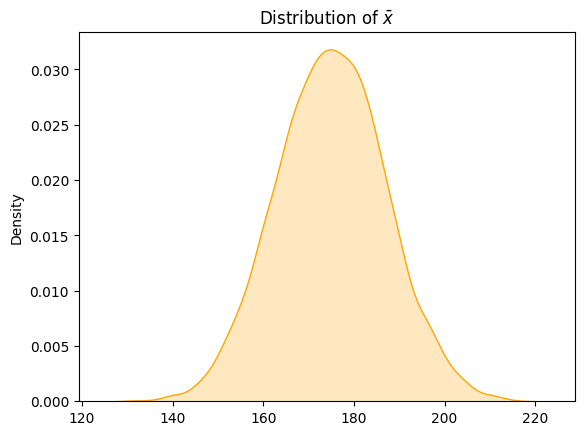

In [4]:
# the distribution of x_bar
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(x_bar_samples, fill = True , color = "Orange")
plt.title(r'Distribution of $\bar{x}$')
plt.show()

expcted mean 175.0; sample mean 174.8849
expcted std 12.083045973594572; sample mean 12.118871729249385


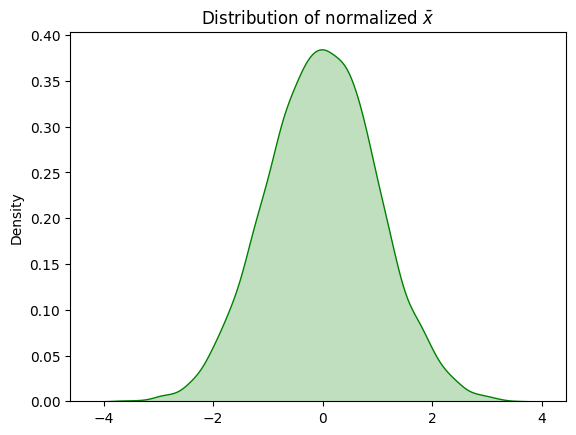

In [5]:
# the distribution normalilzed
import math
import numpy as np

expected_mean = mu_x*N
expected_sigma = math.sqrt(N)*math.sqrt(var_x)

sample_mean = np.mean(x_bar_samples)
sample_sigma = np.std(x_bar_samples)

print(f"expcted mean {expected_mean}; sample mean {sample_mean}")
print(f"expcted std {expected_sigma}; sample mean {sample_sigma}")

plt.title(r'Distribution of normalized $\bar{x}$')
norm_x_bar_sampeles = [ (x_bar_samples[i]-expected_mean)/expected_sigma   for i in range(0, len(x_bar_samples)) ]
sns.kdeplot(norm_x_bar_sampeles , fill = True , color = "Green")
plt.show()

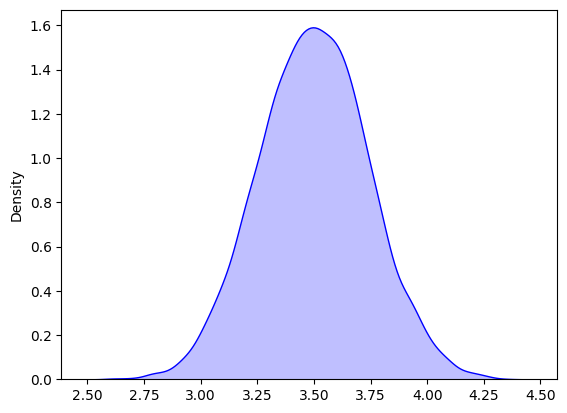

In [6]:
# let's what now to the distribution of x_bar/N

x_bar_means = [ (x_bar_samples[i])/N   for i in range(0, len(x_bar_samples)) ]
sns.kdeplot(x_bar_means , fill = True , color = "Blue")
plt.show()

With the distribution of the means of $\bar{x}$, i.e. $\bar{x}/N$, inferences can be made. <br>
An example of application is https://www.analytixlabs.co.in/blog/central-limit-theorem-with-example/

### Comments on MCNP

A Monte-Carlo simulation implies the simulation of random walks and assigning to each one of such random walks a score $x_i$.<br>
The real (unknown) history score probability density function $f(x)$ gives the probability of scoring $x$ by sampling a random walk. The true answer is then given by:<br>
$\begin{align} E(x) = \int{xf(x)dx} \end{align}$
This score is unknow and MCNP gives an estimation of such radiation quantity by giving the sample of mean of $N$ sampled random walks:<br>
$\begin{align} \bar{x} = \frac{1}{N} \sum_i{x_i}  \end{align}$
This estimation would converge to the true mean if $ N -> \infty $. <br>
On the other hand the estimation of the sample variance $S^2$ is given by:<br>
$\begin{align} S^2 = \frac{\sum_i{(x_i-\bar{x})^2}}{N-1} \end{align}$
<br><br>

### Error estimation in MCNP

From the central limit theorem, it can be stated that the MCNP estimation of the mean, namely $ \bar{x} $, would distribute normally if we were to run other MCNP simulations.  <br>
The variance of such normal distribution is then given by: <br>

$\begin{align} S^2_{\bar{x}} = \frac{S^2}{N} \end{align}$

Since $ S^2_{\bar{x}} $ is the best estimation of the true variance of $f{x}$, it can be stated that:<br>
* $\bar{x} - S_{\bar{x}} < E(x) < \bar{x} + S_{\bar{x}} \approx 68%$ of the time
* $\bar{x} - 2 S_{\bar{x}} < E(x) < \bar{x} + 2 S_{\bar{x}} \approx 95%$ of the time